# Project: Review and analysis of FBI Gun Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [3]:
# Load data
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [10]:
df_gun_data = pd.read_excel('gun_data.xlsx')
df_gun_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [11]:
list_column = df_gun_data.columns.to_list()
print(f'List column: {list_column}\n')
print(f'Total record: {len(df_gun_data)}')

List column: ['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun', 'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun', 'prepawn_other', 'redemption_handgun', 'redemption_long_gun', 'redemption_other', 'returned_handgun', 'returned_long_gun', 'returned_other', 'rentals_handgun', 'rentals_long_gun', 'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other', 'return_to_seller_handgun', 'return_to_seller_long_gun', 'return_to_seller_other', 'totals']

Total record: 12485


- As collected above information of the dataframe, there are many information in data source such as:

- There are 12485 rows.
- There are 27 columns. But i use column month, state, handgun, long_gun, other and totals for project. Other columnns are not useful and I will not care them.

In [16]:
use_columns = ['month', 'state', 'handgun', 'long_gun', 'other', 'totals']
df = df_gun_data[use_columns]

In [17]:
df.head()

,month,state,handgun,long_gun,other,totals
0,2017-09,Alabama,5734.0,6320.0,221.0,32019
1,2017-09,Alaska,2320.0,2930.0,219.0,6303
2,2017-09,Arizona,11063.0,7946.0,920.0,28394
3,2017-09,Arkansas,4347.0,6063.0,165.0,17747
4,2017-09,California,37165.0,24581.0,2984.0,123506


Cleansing data

- Drop duplication 
- Drop colum not user
- Conver column month to datetime

In [18]:
# check duplication value
df.duplicated().sum()

0

Data have not duplication rows

In [19]:
df.isnull().sum()

month          0
state          0
handgun       20
long_gun      19
other       6985
totals         0
dtype: int64

Columns month and totals have not record null
The data is good.
I used the the data analyst

In [22]:
# convet column month to date time
df.dtypes

month        object
state        object
handgun     float64
long_gun    float64
other       float64
totals        int64
dtype: object

In [26]:
df['month'] = pd.to_datetime(df['month'])
df.dtypes

/var/folders/sp/3g39myk533z6_4gvv18kdwd00000gn/T/ipykernel_29996/4100570851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = pd.to_datetime(df['month'])


month       datetime64[ns]
state               object
handgun            float64
long_gun           float64
other              float64
totals               int64
dtype: object

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   month     12485 non-null  datetime64[ns]
 1   state     12485 non-null  object        
 2   handgun   12465 non-null  float64       
 3   long_gun  12466 non-null  float64       
 4   other     5500 non-null   float64       
 5   totals    12485 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 585.4+ KB


<a id='eda'></a>
## Exploratory Data Analysis

### Question 1. What are the distributions of Firearms from 1998 to 2017?

In [33]:
df['month'].min()

Timestamp('1998-11-01 00:00:00')

In [34]:
df['month'].max()

Timestamp('2017-09-01 00:00:00')

Text(0, 0.5, 'Counts')

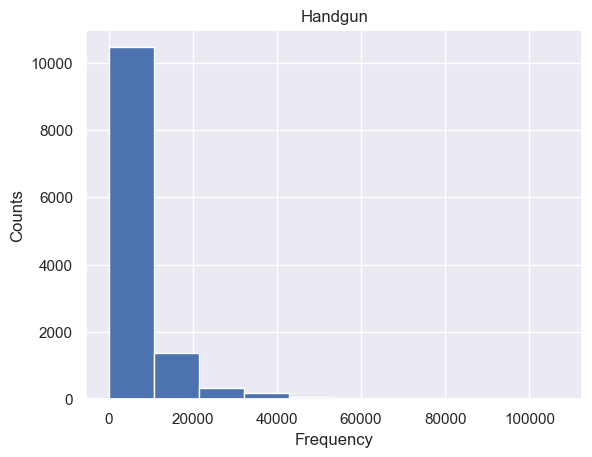

In [35]:
# Histogram for Handgun
plt.hist(df['handgun'])
plt.title("Handgun")
plt.xlabel('Frequency')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

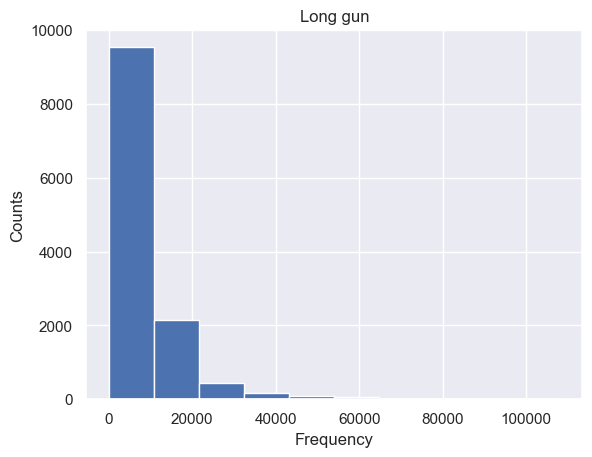

In [36]:
# Histogram for Handgun
plt.hist(df['long_gun'])
plt.title("Long gun")
plt.xlabel('Frequency')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

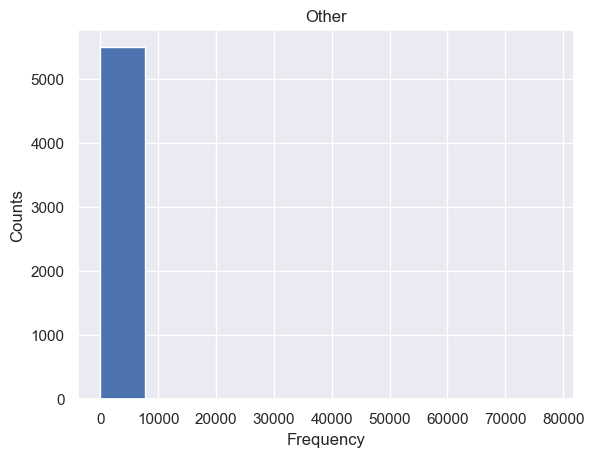

In [37]:
# Histogram for Handgun
plt.hist(df['other'])
plt.title("Other")
plt.xlabel('Frequency')
plt.ylabel('Counts')

The above histograms are the distributions of firearms from 1998 to 2017. It shows a right skewed distribution.

Long gun background checks have more variablity from 0 to 50,000 compared to Hand gun or other firearms.

### Question 2. What states have most total backgroup checks

In [52]:
df_states_checks = df.groupby('state').totals.sum().nlargest(20)
df_states_checks.head()

state
Kentucky        29762434
Texas           19435186
California      19014063
Illinois        15471534
Pennsylvania    13133876
Name: totals, dtype: int64

In [53]:
states = df_states_checks.index.tolist()

In [54]:
states

['Kentucky',
 'Texas',
 'California',
 'Illinois',
 'Pennsylvania',
 'Florida',
 'Ohio',
 'North Carolina',
 'Indiana',
 'Tennessee',
 'Michigan',
 'Georgia',
 'Alabama',
 'Missouri',
 'Washington',
 'Minnesota',
 'Colorado',
 'Virginia',
 'Wisconsin',
 'Louisiana']

/var/folders/sp/3g39myk533z6_4gvv18kdwd00000gn/T/ipykernel_29996/2166635071.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(states, fontsize = 20)
/var/folders/sp/3g39myk533z6_4gvv18kdwd00000gn/T/ipykernel_29996/2166635071.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticks, fontsize = 20)


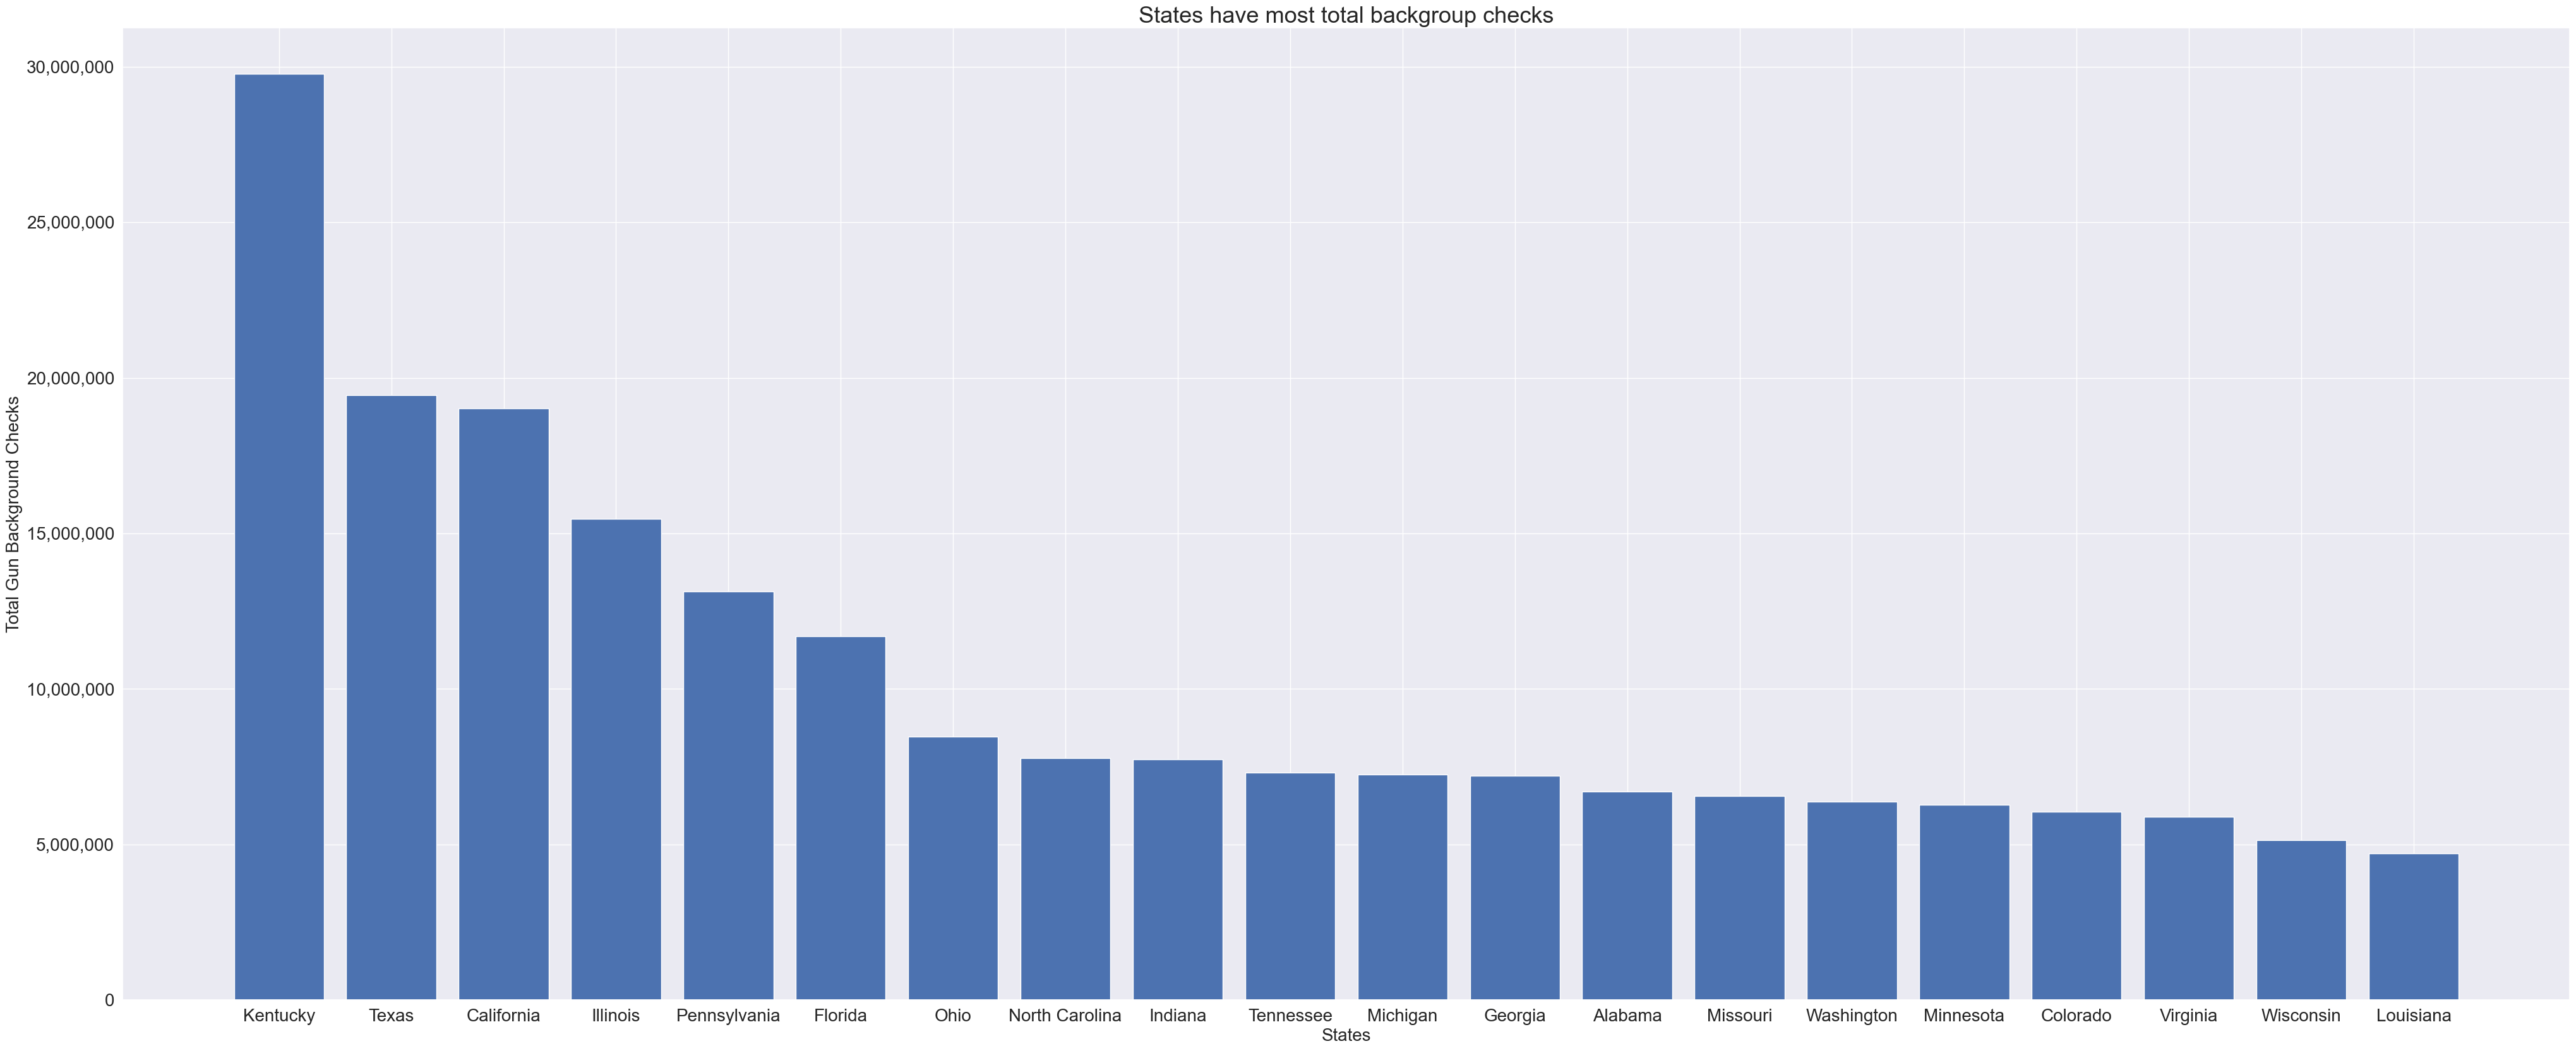

In [66]:
# create the plot
fig, ax = plt.subplots(figsize=(50,20)) 
ax.bar(states,df_states_checks)

# format x labels
ax.set_xticklabels(states, fontsize = 20)

# format y labels
yticks = [ "{0:,.0f}".format(y) for y in ax.get_yticks() ];
ax.set_yticklabels(yticks, fontsize = 20)

# set axis labels
ax.set_title('States have most total backgroup checks', fontsize= 26)
ax.set_xlabel('States', fontsize = 20)
ax.set_ylabel('Total Gun Background Checks', fontsize = 20);

- Until 2017, Kentucky performed the most testing. Shows that Kentucky regularly checks the sale and use of guns, thereby determining whether these people are qualified to use guns or not.
- Texas and California, according to the data, are the two states that also perform the most testing. This is a developed state in the United States, as well as a multi-ethnic region, so testing is also strict.
- Recently, due to many shooting incidents, the US government has tightened restrictions on gun ownership.

### Question 3. Has the trend of gun inspections increased over the years?

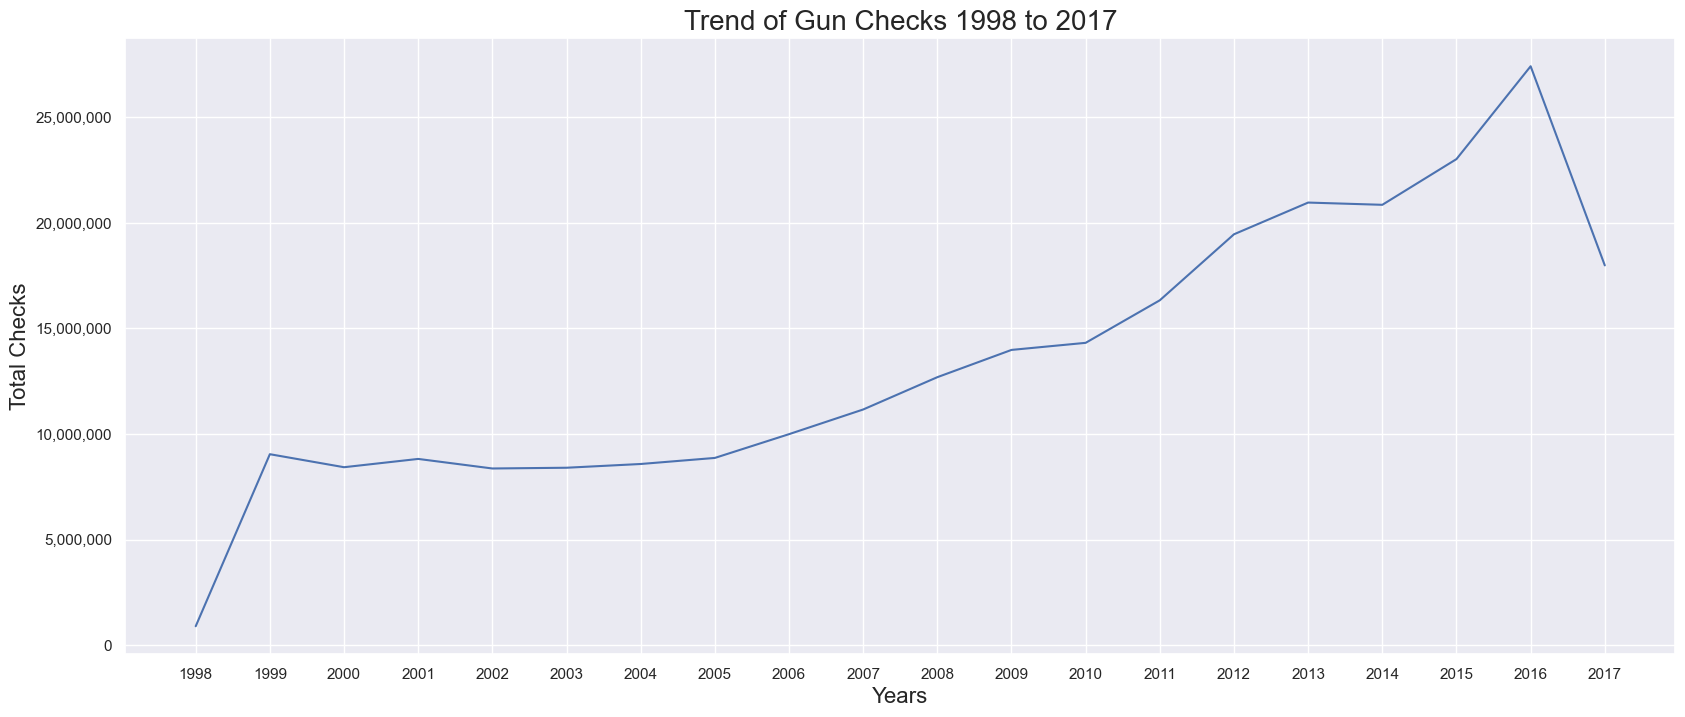

In [86]:
df_year_check = df.groupby(df['month'].dt.year).totals.sum()
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df_year_check)
plt.xticks(range(1998,2018))

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# set axis labels
ax.set_title('Trend of Gun Checks 1998 to 2017', fontsize= 20)
ax.set_xlabel('Years', fontsize = 16)
ax.set_ylabel('Total Checks', fontsize = 16);

Gun inspections have become more stringent over the years.
But by 2017, the number of inspections had decreased significantly.

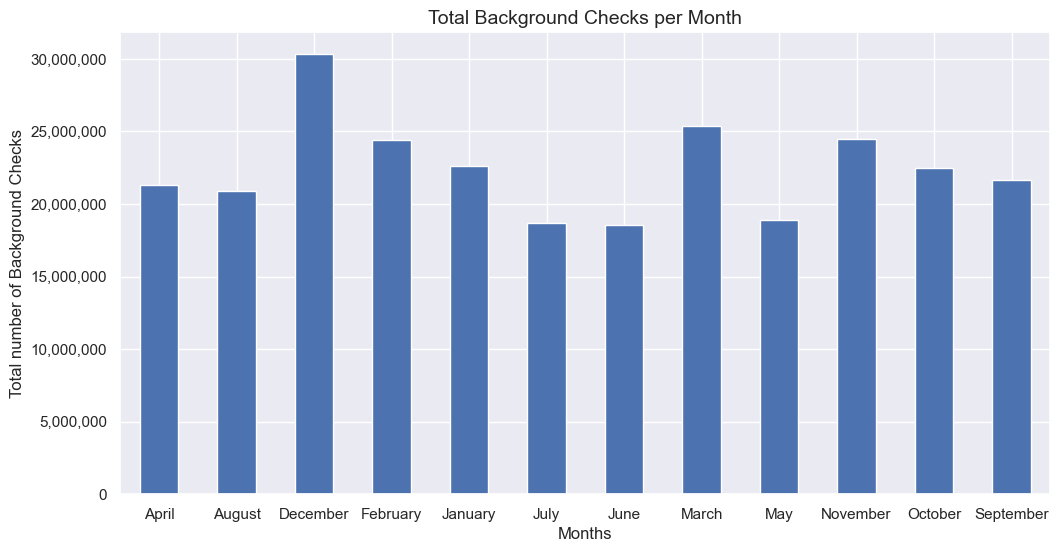

In [89]:
df_month_checks = df.groupby(df['month'].dt.month_name()).totals.sum()
ax = df_month_checks.plot(kind='bar', figsize=(12,6))

# format ylabel
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# set axis labels and title
ax.set_title('Total Background Checks per Month', fontsize= 20)
ax.set_xlabel('Months', fontsize = 16)
ax.set_xticklabels(df_month_checks.index.tolist(),rotation=0)
ax.set_ylabel('Total number of Checks', fontsize = 16b);

December has many important holidays for Americans such as Christmas or New Year, with many crowded activities, so inspections mainly take place during this time.

## Conclusions
Bravo, with 3 above questions that I tried to find out:
- The chart shows that there is a lot of demand for handguns. It seems to be more popular than other types.
- Kentucky is a state with regular testing. Texas and California are states that also conduct a lot of gun testing. From the chart we can see that the number of inspections increases each year. 
- Shows that the use of guns is becoming more strict. Inspections are often carried out in December, a month with many major holidays such as Christmas and New Year.

### Limitations:
When I analyze the data, there are 2 things that can affect the results.
1. New data is only available up to 2017.
2. NICS background checks are not related to gun sales. The inspection is merely a verification effort when purchasing a gun.